This notebook is to practice the use of statistical approach to understand and draw hypothesis with data. A data file having features such as heights and weights data of football players is examined and some hypothesis are drawn with the data.

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Pandas and reading from a .tsv file. There is no heading in the file so the names are to set headings. Dataframes are used to store an instance of the read file.

In [3]:
df = pd.read_csv("../../data/SOCR_MLB.tsv", sep = "\t", header=None, names = ['Name','Team','Role','Height','Weight','Age'])
df.head()

,Name,Team,Role,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [4]:
df.info() #This shows aggregate information on the data file


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    1034 non-null   object 
 1   Team    1034 non-null   object 
 2   Role    1034 non-null   object 
 3   Height  1034 non-null   int64  
 4   Weight  1033 non-null   float64
 5   Age     1034 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


In [5]:
df.describe() #This is done to describe the data with mean, Q1, Q2, Q3 min and max values of the columns having integer and float features

,Height,Weight,Age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


In [24]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} number of baseball players in this dataset \n".format(len(df.Name)))

print("Here is the distribution of this dataset according to roles: \n{} \n".format(df["Role"].value_counts()))


There are 1034 observations and 6 features in this dataset. 

There are 1034 number of baseball players in this dataset 

Here is the distribution of this dataset according to roles: 
Relief_Pitcher       315
Starting_Pitcher     221
Outfielder           194
Catcher               76
Second_Baseman        58
First_Baseman         55
Shortstop             52
Third_Baseman         45
Designated_Hitter     18
Name: Role, dtype: int64 



In [7]:
#We import numpy as np, Numpy is used to carry out statistical operations on matrices such as mean, std and variance

mean = np.mean(df['Height'])
print (mean)

73.6972920696325


In [8]:
#mean and std can also be displayed using the functions as shown
Mean_height = df["Height"].mean() 

# Also np.mean(df["Height"]) can be used

Std_height = df['Height'].std()

In [9]:
print("the mean heights of players are", Mean_height)
#print(f"the mean heights of players are {df.Height.mean()}")
print("the standard deviation value of heights of players are", Std_height)

the mean heights of players are 73.6972920696325
the standard deviation value of heights of players are 2.3058183105175645


In [10]:
df[['Age','Height','Weight']].mean() #To display means of several data frames

Age        28.736712
Height     73.697292
Weight    201.689255
dtype: float64

In [11]:
print(list((df['Height'])[:20]))

[74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 72, 73, 75, 78]


In [12]:
mean = df[['Height', 'Weight', 'Age']].mean()
std = df[['Height','Weight', 'Age']].std()
var = df[['Height','Weight', 'Age']].var()

print(f"Means {mean} ,\n Standard deviations {std}, \n and Variances  {var}")

Means Height     73.697292
Weight    201.689255
Age        28.736712
dtype: float64 ,
 Standard deviations Height     2.305818
Weight    20.991491
Age        4.320310
dtype: float64, 
 and Variances  Height      5.316798
Weight    440.642685
Age        18.665079
dtype: float64


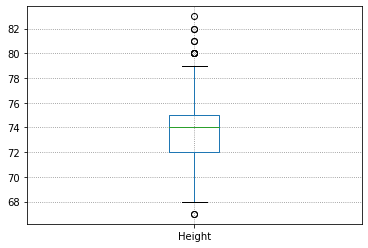

In [13]:

#df.hist(column  = "Height")

df.boxplot(column  = "Height")
plt.xticks(rotation=None)

'''
plt.figure(figsize=(10, 2))
plt.boxplot(df['Height'], vert=False, showmeans=True)

plt.title("Boxplot showing heights")
plt.xlabel("Heights")
'''
#plt.hist(df['Height'])
plt.grid(color='gray',linestyle='dotted')
plt.show()


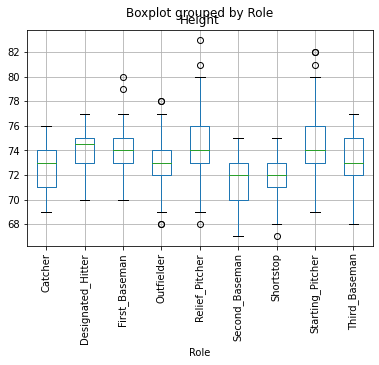

In [14]:
#plt.figure(figsize=(20,10), dpi = 15)
df.boxplot(column='Height',by='Role')
plt.xticks(rotation='vertical')
plt.show()

In [15]:
# to generate some random data for heights using the mean and standard deviation values we had


mean = df['Height'].mean()
std = df['Height'].std()

generated = np.random.normal(mean,std,1000)
generated[:20]

array([75.02895701, 76.42108235, 73.18072994, 74.20639455, 73.13184771,
       73.920696  , 77.8709505 , 71.9465653 , 74.26283109, 71.3193785 ,
       73.8627057 , 74.20930347, 72.64505652, 74.13603145, 74.26424009,
       73.87004736, 69.27692822, 72.36330194, 73.00268996, 73.32559399])

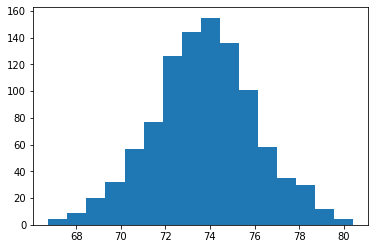

In [16]:
plt.hist(generated, bins = 16)
plt.show()

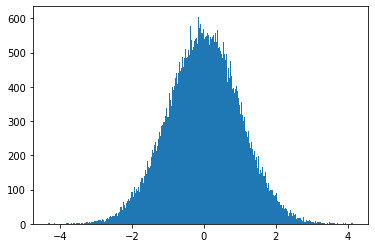

In [17]:
#This is to generate a random normal distribution with mean = 0, std = 1, having 300 bins

plt.hist(np.random.normal(0,1,50000),bins=300) 
plt.show()

<class 'numpy.ndarray'>


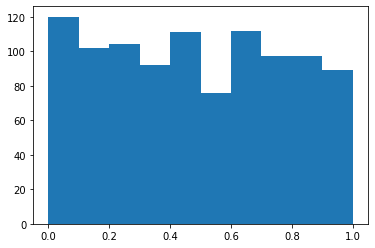

In [18]:
#The random numbers can also be generated in a way that does not follow a normal distribution
wrong_sample = np.random.rand(1000)
#print (wrong_sample)
print(type(wrong_sample))
plt.hist(wrong_sample)
plt.show()

To generate a description of the data with reference to a particular column groupings

In [19]:
df.groupby("Role").agg({"Height":"mean", "Weight":"mean", "Name":"count"}).rename(columns={"Name":"Count"})

,Height,Weight,Count
Role,,,
Catcher,72.723684,204.328947,76
Designated_Hitter,74.222222,220.888889,18
First_Baseman,74.000000,213.109091,55
Outfielder,73.010309,199.113402,194
Relief_Pitcher,74.374603,203.517460,315
Second_Baseman,71.362069,184.344828,58
Shortstop,71.903846,182.923077,52
Starting_Pitcher,74.719457,205.163636,221
Third_Baseman,73.044444,200.955556,45


For confidence interval using scipy.stats

In [20]:
from scipy.stats import norm

In [21]:
D = df["Height"]
mean = df.Height.mean()
std = df.Height.std()

In [25]:
D = norm(mean, std)
for x in [.95, .90, .85]:
    print(f'{D.interval(x)}, {x*100}% confidence level')


(69.17797122612508, 78.21661291313991), 95.0% confidence level
(69.90455845848656, 77.49002568077843), 90.0% confidence level
(70.37799404537633, 77.01659009388867), 85.0% confidence level


to find the mean heights of catchers using the Role and the Height column data

In [33]:
meanCatcher = (df.loc[df['Role'] == "Catcher",["Height"]]).mean()
print(meanCatcher)

#to generate the mean for first baseman and second baseman
meanFirstBase = (df.loc[df['Role'] == "First_Baseman",["Height"]]).mean()
stdFirstBase = (df.loc[df['Role'] == "First_Baseman",["Height"]]).std()
meanSecondBase = (df.loc[df['Role'] == "Second_Baseman",["Height"]]).mean()
stdSecondBase = (df.loc[df['Role'] == "Second_Baseman",["Height"]]).std()
print(f"Mean value for the first baseman is {meanFirstBase}")
print(f"Std value for the first baseman is {stdFirstBase}")
print(f"Mean value for the first baseman is {meanSecondBase}")
print(f"Std value for the first baseman is {stdSecondBase}")

Height    72.723684
dtype: float64
Mean value for the first baseman is Height    74.0
dtype: float64
Std value for the first baseman is Height    1.953155
dtype: float64
Mean value for the first baseman is Height    71.362069
dtype: float64
Std value for the first baseman is Height    1.693105
dtype: float64


Lets play around with confidence level generating inbuilt function in Scipy.stats
using a normal distribution. 
this is not the confidence interval for our distribution but for a normal distribution using the mean and sandard deviation values from our distribution.

In [34]:
D = norm(meanFirstBase, stdFirstBase)
for x in [.95, .90, .85]:
    print(f'{D.interval(x)}, {x*100}% confidence level')

(array([70.17188636]), array([77.82811364])), 95.0% confidence level
(array([70.78734576]), array([77.21265424])), 90.0% confidence level
(array([71.18837178]), array([76.81162822])), 85.0% confidence level


In [39]:
D = norm(meanSecondBase, stdSecondBase)
print(type (D))
for x in [.95, .90, .85]:
    print(f'{D.interval(x)}, {x*100}% confidence level')

<class 'scipy.stats._distn_infrastructure.rv_frozen'>
(array([68.0436432]), array([74.68049473])), 95.0% confidence level
(array([68.57715827]), array([74.14697966])), 90.0% confidence level
(array([68.92479034]), array([73.79934759])), 85.0% confidence level


In [44]:
help("modules _distn_infrastructure")


Here is a list of modules whose name or summary contains '_distn_infrastructure'.
If there are any, enter a module name to get more help.

scipy.stats._distn_infrastructure 
No CUDA runtime is found, using CUDA_HOME='C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA\v11.3'



To generate the confidence level for our distribution, and to prove our hypothesis that all first basemen are taller than second basemen. This hypothesis was drawn because the first baseman are averagely taller than the second baseman. To test this hypothesis, Lets generate our confidence interval.

In [52]:
import numpy as np
import scipy.stats as st

# we create a variable FBdata to hold first baseman height data 
FBdata = df.loc[df['Role'] == "First_Baseman",["Height"]]

#create 95% confidence interval for population mean height
#using inbuilt function st.t.interval, we pass in confidence value, n-1, mean, standard error of mean caclculated with inbuilt function st.sem
print(f"95% confidence interval for First baseman Heights is {st.t.interval(alpha=0.95, df=len(FBdata)-1, loc=np.mean(FBdata), scale=st.sem(FBdata))}")

#similarly for second baseman
SBdata = df.loc[df['Role'] == "Second_Baseman",["Height"]]
print(f"95% confidence interval for Second baseman Heights is {st.t.interval(alpha=0.95, df=len(SBdata)-1, loc=np.mean(SBdata), scale=st.sem(SBdata))}")

95% confidence interval for First baseman Heights is (array([73.47198822]), array([74.52801178]))
95% confidence interval for Second baseman Heights is (array([70.91688957]), array([71.80724836]))


To calculate the confidence interval for the weight

In [92]:

#First Basemen weight data
FBWdata = df.loc[df['Role'] == "First_Baseman",["Weight"]]
#Second Basemen weight data
SBWdata = df.loc[df['Role'] == "Second_Baseman",["Weight"]]

#create 95% confidence interval for population mean height
#using inbuilt function st.t.interval, we pass in confidence value, n-1, mean, standard error of mean caclculated with inbuilt function st.sem
conf = [0.95,0.90,0.85]
print(f"95% confidence interval - 1st baseman Weights is {st.t.interval(alpha=conf[0], df=len(FBWdata)-1, loc=np.mean(FBWdata), scale=st.sem(FBWdata))} 2nd baseman Weights is {st.t.interval(alpha=conf[0], df=len(SBWdata)-1, loc=np.mean(SBWdata), scale=st.sem(SBWdata))}")
print(f"90% confidence interval - 1st baseman Weights is {st.t.interval(alpha=conf[1], df=len(FBWdata)-1, loc=np.mean(FBWdata), scale=st.sem(FBWdata))}2nd baseman Weights is {st.t.interval(alpha=conf[1], df=len(SBWdata)-1, loc=np.mean(SBWdata), scale=st.sem(SBWdata))}")
print(f"85% confidence interval - 1st baseman Weights is {st.t.interval(alpha=conf[2], df=len(FBWdata)-1, loc=np.mean(FBWdata), scale=st.sem(FBWdata))}2nd baseman Weights is {st.t.interval(alpha=conf[2], df=len(SBWdata)-1, loc=np.mean(SBWdata), scale=st.sem(SBWdata))}")





95% confidence interval - 1st baseman Weights is (array([207.96538518]), array([218.25279664])) 2nd baseman Weights is (array([181.44956935]), array([187.24008582]))
90% confidence interval - 1st baseman Weights is (array([208.81540328]), array([217.40277854]))2nd baseman Weights is (array([181.92733]), array([186.76232517]))
85% confidence interval - 1st baseman Weights is (array([209.36253926]), array([216.85564256]))2nd baseman Weights is (array([182.23505168]), array([186.45460349]))


From the confidence interval of the means calulated, we can see that the intervals do not overlap. We have therefore correctly proved that all the First Baseman are having more weight than all the Second Baseman players.

To calculate the confidence interval of the entire weight mean.

Note: the use of fillna method is to remove all the nan values in the list

In [78]:
weight = list(df["Weight"].fillna(method='pad'))
print(f"95% confidence interval for the Weights column is {st.t.interval(alpha=0.95, df=len(weight)-1, loc=np.mean(weight), scale=st.sem(weight))}")

print(f"90% confidence interval for the Weights column is {st.t.interval(alpha=0.90, df=len(weight)-1, loc=np.mean(weight), scale=st.sem(weight))}")

print(f"85% confidence interval for the Weights column is {st.t.interval(alpha=0.85, df=len(weight)-1, loc=np.mean(weight), scale=st.sem(weight))}")

95% confidence interval for the Weights column is (200.4438894118501, 203.00872180671857)
90% confidence interval for the Weights column is (200.65036411000037, 202.8022471085683)
85% confidence interval for the Weights column is (200.7848150904331, 202.66779612813556)


To further justify the hypothesis that all First Baseman players have more weight than all the Second Baseman players, we use the student t-test.

Higher values of the t-value, also called t-score, indicate that a large difference exists between the two sample sets. The smaller the t-value, the more similarity exists between the two sample sets. A large t-score indicates that the groups are different. A small t-score indicates that the groups are similar
p-value is used to describe the probability that the null hypothesis is right or not right. The smaller the p-value the more significant our hypothesis and the less significant the null hypothesis. The null hypothesis is that the two sample sets are not in any way correlated. With a p-value of less than or equal to 0.05, the null hypothesis is considered untrue. When p-value = 0.05, null hypothesis is 95% untrue.

In [93]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Weight']], df.loc[df['Role']=='Second_Baseman',['Weight']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322125e-15


The p-value we arrived at shows that there is a relationship between the First_Baseman Weight and the Second Baseman Weight.

the t-value of 9.77 shows that there is a difference of 9.77 between the First_Baseman Weight and the Second Baseman Weight. 

To create a uniform distribution of means of sample size 100 of numbers between 0 and 1

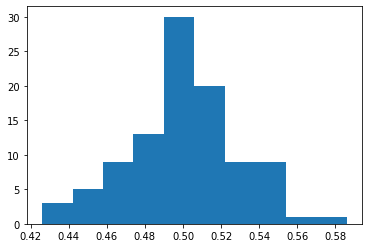

In [103]:

def normal_random(sample_range = 100):
    sample = [np.random.uniform(0,1) for i in range (sample_range)]
    return sum(sample)/len(sample)
sample = [normal_random() for _ in range(100)]
plt.hist(sample)
plt.show()

To check if there exists a correlation between the Heights and Weights we check the correlation coefficients


In [104]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

The correlation coefficient is 0.53 which shows that the heights and weights are moderately correlated.

Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

We plot a scatter graph to show the Height and Weight patterns. A more correlated distribution would have points that are closely packed on the graph.

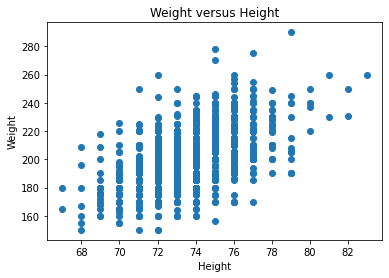

In [109]:
plt.scatter(df.Height, df.Weight)
plt.title("Weight versus Height")
plt.xlabel("Height"); plt.ylabel("Weight")
plt.show()